# Network Traffic Anomaly Detection – Data Exploration

In this notebook, we explore the CICIDS2017 dataset and:

- Perform basic data exploration and visualization of network traffic classes.
- Create a binary target variable to distinguish between attack and benign traffic.
- Clean the dataset by removing irrelevant columns and handling missing values.
- Prepare the dataset for machine learning by selecting features, normalizing them, and splitting the data into training and testing sets.

This step is essential to understand the dataset structure and ensure the data is clean and ready for modeling.


In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils import load_data_files, load_data_file, display_data_info, display_distribution

from preprocess import (
    clean_data, 
    handle_infinite_values, 
    apply_and_save_scaler,
    separate_features_and_target,
    split_data
)

In [2]:
file_path1 = "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
file_path2 = "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
file_path3 = "../data/Tuesday-WorkingHours.pcap_ISCX.csv"
file_path4 = "../data/Wednesday-workingHours.pcap_ISCX.csv"
df1 = load_data_file(file_path1)
df2 = load_data_file(file_path2)
df3 = load_data_file(file_path3)
df4 = load_data_file(file_path4)

display_distribution(df1)
display_distribution(df2)
display_distribution(df3)
display_distribution(df4)


 ' Attack' column created with value counts: Attack
1    28359
0    21641
Name: count, dtype: int64

 ' Attack' column created with value counts: Attack
1    27877
0    22123
Name: count, dtype: int64

 ' Attack' column created with value counts: Attack
0    48483
1     1517
Name: count, dtype: int64

 ' Attack' column created with value counts: Attack
0    31530
1    18470
Name: count, dtype: int64


In [3]:
# Load dataset
# Use the CICIDS2017 CSV files
file_paths = [
    "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",     # DDoS
    "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", # Port Scan
    "../data/Tuesday-WorkingHours.pcap_ISCX.csv",                   # Brute Force (FTP & SSH)
    "../data/Wednesday-workingHours.pcap_ISCX.csv"                  # DoS (Slowloris, Hulk, etc.)
]
df = load_data_files(file_paths)


=== NUMBER OF ROWS ===
200000

=== DATA TYPES OF EACH COLUMN ===
Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Attack                           int64
Length: 80, dtype: object

=== ALL COLUMN NAMES ===
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd I

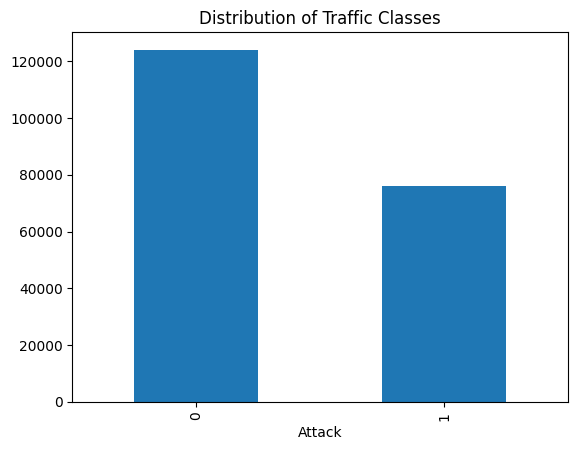

In [4]:
# Display DATASET information
display_data_info(df)

In [5]:
# Clean the dataset
df = clean_data(df)

Removed rows with missing values. Remaining rows: 199904


=== NUMBER OF ROWS ===
199904

=== DATA TYPES OF EACH COLUMN ===
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
Total Length of Bwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Attack                           int64
Length: 71, dtype: object

=== ALL COLUMN NAMES ===
['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT 

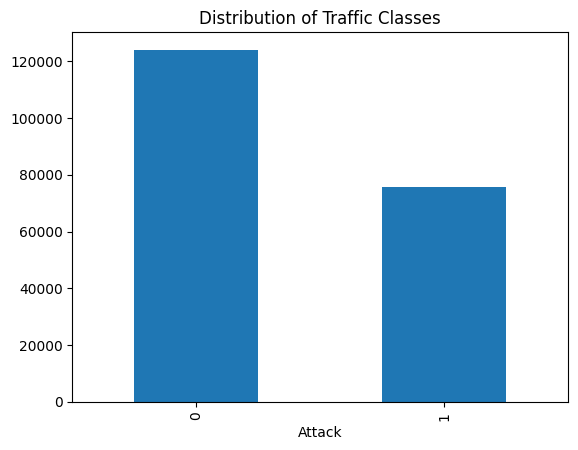

In [6]:
# Display the outputs that weren't shown in the previous cell
display_data_info(df)

In [7]:
# Separete features and target variable
X, y = separate_features_and_target(df)

In [8]:
# Display the features and target variable
print("\n--- FEATURES (X) ---")
print(len(X), "rows and", len(X.columns), "columns")
print("\n--- TARGET VARIABLE (y) ---")
print(len(y), "rows")

print("shape of dataset:", df.shape)
print("target balance:", y.value_counts())


--- FEATURES (X) ---
199904 rows and 70 columns

--- TARGET VARIABLE (y) ---
199904 rows
shape of dataset: (199904, 71)
target balance: Attack
0    124061
1     75843
Name: count, dtype: int64


In [8]:
# # Save the cleaned dataset
# df.to_csv("../data/cleaned_dataset.csv", index=False)
# print("\nCleaned dataset saved to '../data/cleaned_dataset.csv'")
# # Save the features and target variable
# X.to_csv("../data/X_data.csv", index=False)
# y.to_csv("../data/y_data.csv", index=False)
# print("\nFeatures saved to '../data/X_data.csv'")
# print("Target variable saved to '../data/y_data.csv'")

In [9]:
# Normalize the dataset

# Handle infinite values first
X_clean = handle_infinite_values(X)

# Scale the features
X_scaled = apply_and_save_scaler(X_clean, '../models/scalers/01_scaler.pkl')


Checking for infinite values in the dataset:
188
Using StandardScaler for scaling features.
Scaler saved as ../models/scalers/01_scaler.pkl.


In [10]:
# Print shape of the variables
print("Shape of scaled features (X_scaled):", X_scaled.shape)
print("Shape of target variable (y):", y.shape)

Shape of scaled features (X_scaled): (199904, 70)
Shape of target variable (y): (199904,)


In [11]:
# Divide the dataser into training and testing sets
x_train, x_test, y_train, y_test = split_data(X_scaled, y)

Data split into training and testing sets.


In [12]:
# Print shape of all variables
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (159923, 70)
x_test: (39981, 70)
y_train: (159923,)
y_test: (39981,)
